<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_100_TempConverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 485B Spring 2023: CSC485_100_TempConverter using Linear Regression
## Just a a trivial example to show the mechanics.
## Can we figure out Celius to Fahrenheit conversion?
* SUNY Plattsburgh, Spring 2023
* Dr. Ned Lecky
* nleck001@plattsburgh.edu
* ned@lecky.com

In [1]:
import numpy as np

# My test data: two ordered pairs (Tcelsius, Tfahrenheit) as (x[0],y[0]), (x[1],y[1])
x = np.array([0, 100], dtype=float)
y = np.array([32,212], dtype=float)


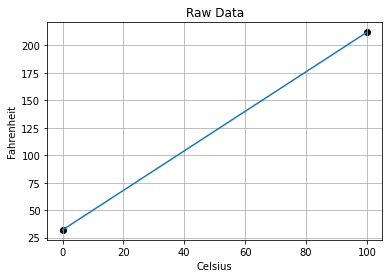

In [2]:
# Let's take a look at the sample data
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
plt.plot(x,y)

plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


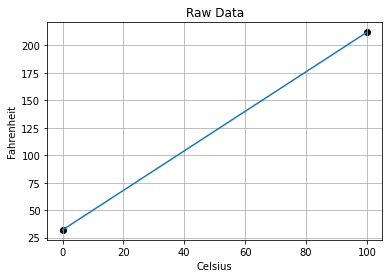

In [3]:
# For n inputs and m outputs with N examples... (Note here n=m=1 and N=2)
# We need X to be an Nxn matrix and Y to be an Nxm matrix
n=1 # 1 input
m=1 # 1 output
N=2 # 2 samples
X = x.reshape(N,n)
Y = y.reshape(N,m)

# Just to show Matplotlib doesn't care about the shape!
plt.scatter(X,Y,color='black')
plt.plot(X,Y)

plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


Coefficients: [[1.8]]
Offsets: [32.]
In other words, Tfahrenheit = [1.8] * Tcelsius + [32.]
Mean squared error: 0.00
Mean absolute error: 0.00


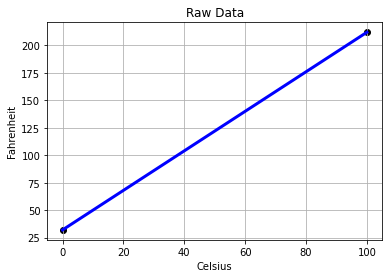

In [5]:
# Now let's train a linear regression (this better work pretty well!!)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

regr = linear_model.LinearRegression()
regr.fit(X, Y)

np.set_printoptions(precision=1) # This seems to be necessary
print(f"Coefficients: {regr.coef_}")
print(f"Offsets: {regr.intercept_}")
print(f"In other words, Tfahrenheit = {regr.coef_[0]} * Tcelsius + {regr.intercept_}")

Y_pred = regr.predict(X)
print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")

# Plot original and predicted
plt.scatter(X, Y, color="black")
plt.plot(X, Y_pred, color="blue", linewidth=3)
plt.title('Raw Data')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.show()


[-100  -90  -80  -70  -60  -50  -40  -30  -20  -10    0   10   20   30
   40   50   60   70   80   90  100  110  120  130  140  150  160  170
  180  190]


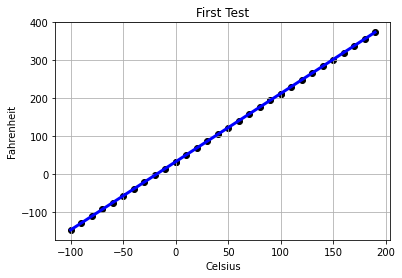

[ 63.7  56.4 -31.5  32.9 -23.4  74.3 -23.2 -72.4 -48.9  40.5  39.6  49.4
 -13.   52.7  85.  -89.3 -12.4  86.5 -37.6 -86.5 -21.  -66.9  71.9 -62.8
  93.9 -45.2 -25.5  52.1 -18.4  87.6 -27.4 -62.4  62.6  44.2  37.3  94.6
  -8.7 -77.9  27.6 -98.6  12.   99.3 -91.5 -85.6 -99.1 -72.1 -64.6  43.9
   1.5 -46.6]


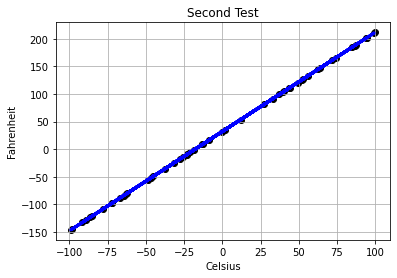

In [6]:
# And we could make a test dataset and it would (of course) work just fine
def test_inputs(X_test, title='Test Data'):
  Y_pred = regr.predict(X_test)

  # Plot original and predicted
  plt.scatter(X, Y, color="black")
  plt.scatter(X_test, Y_pred, color="black")
  plt.plot(X_test, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('Celsius')
  plt.ylabel('Fahrenheit')
  plt.grid()
  plt.show()

# Regular test data
X_test = np.arange(-100,200,10)
print(X_test)
test_inputs(X_test.reshape(-1,1), 'First Test')

# Some random test data
X_test = np.random.rand(50)*200-100
print(X_test)
test_inputs(X_test.reshape(-1,1), 'Second Test')
